In [48]:
import numpy as np
import pandas as pd
# time embedding
from gtda.time_series import TakensEmbedding


In [2]:
data = pd.read_hdf('quartiled_data_1609.h5', 'df')

In [49]:
TE = TakensEmbedding(time_delay=1, dimension=10, flatten=True)
transformed_data = TE.fit_transform(data.loc[:,~data.columns.isin(['state','dataset'])].T)
time_embedded = pd.DataFrame(np.concatenate((transformed_data),axis=1))

In [50]:
time_embedded.to_hdf("auxiliary_behavior_data.h5", key="auxiliary_variables")

In [8]:
np.savez("auxiliary_behavior_data.npz", data.iloc[:,:-2].values)

In [10]:
import cebra
from cebra import CEBRA

In [52]:
#timesteps = 5000
neurons = 74
out_dim = 3

neural_data = time_embedded.values
single_cebra_model = CEBRA(batch_size=512,
                            output_dimension=out_dim,
                            max_iterations=10,
                            max_adapt_iterations=10)

In [53]:
single_cebra_model.fit(neural_data)

CEBRA(batch_size=512, max_adapt_iterations=10, max_iterations=10,
      output_dimension=3)

In [54]:
embedding = single_cebra_model.transform(neural_data)

<Axes3D: title={'center': 'Embedding'}>

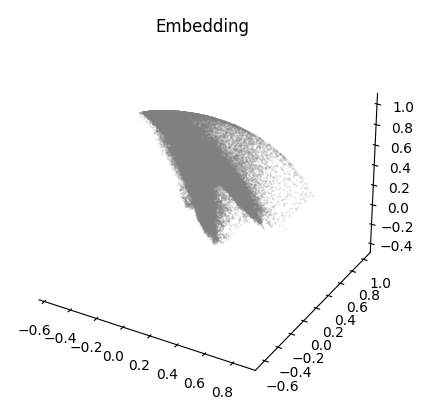

In [55]:
cebra.plot_embedding(embedding)

In [28]:
import plotly.express as px

In [46]:
embedding

array([[-0.344825  , -0.86648703,  0.36096531],
       [-0.33635738, -0.88851357,  0.31210166],
       [-0.3439025 , -0.88342327,  0.31826776],
       ...,
       [-0.18114807, -0.9823488 ,  0.04665094],
       [-0.17968141, -0.98282903,  0.04197174],
       [-0.17552261, -0.98213625,  0.06782433]])

In [58]:
np.save("cebra_embedding_DS1.npy", embedding[:3329,:])

In [57]:
px.line(embedding[:3329,:])